# Read CSVs

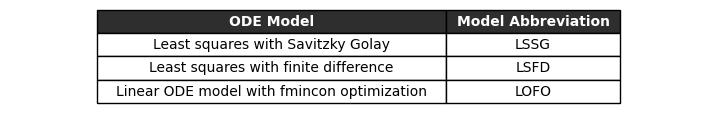

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

model_data_folder = '/Users/lalit/Desktop/self/Uni/MS Project Thesis/codebase/hr-power-reln-app/src/services/MATLAB Model data/'

file_name_labels = {
    'Connor Swift.csv' : 'PA',
    'Robert Gesink.csv' : 'PB',
    'Michal Kwiatkowski.csv' : 'PC',
    'Ralph Dowdell.csv' : 'AA',
    'Constantin Bartels.csv' : 'AB',
    'Theo Arvanitakis.csv' : 'AC'
}

all_results_df = {} 

for file_name, label in file_name_labels.items():
    model_results_file_path = os.path.join(model_data_folder, file_name) 
    results_df = pd.read_csv(model_results_file_path) 
    all_results_df[label] = results_df


data = {
    'ODE Model': ['Least squares with Savitzky Golay',  'Least squares with finite difference', 'Linear ODE model with fmincon optimization'],
    'Model Abbreviation': ['LSSG','LSFD','LOFO']
}
cell_text = [[data['ODE Model'][i], data['Model Abbreviation'][i]] for i in range(len(data['ODE Model']))]

fig, ax = plt.subplots(figsize=(9, 0.5))
ax.axis('off')

# Create the table row by row
table = ax.table(cellText=cell_text,
                 colLabels=list(data.keys()),
                 colWidths=[0.5] + [0.25],
                 loc='center')

# Style the header with dark grey background
header_cells = table.get_celld()
for (i, j), cell in header_cells.items():
    if i == 0:
        cell.set_text_props(weight='bold', color='white')  # Bold white text
        cell.set_facecolor('#2E2E2E')  # Dark grey background

cell_dict = table.get_celld()
for key, cell in cell_dict.items():
    cell.set_text_props(va='center', ha='center')
    
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.show()

# Boxplot

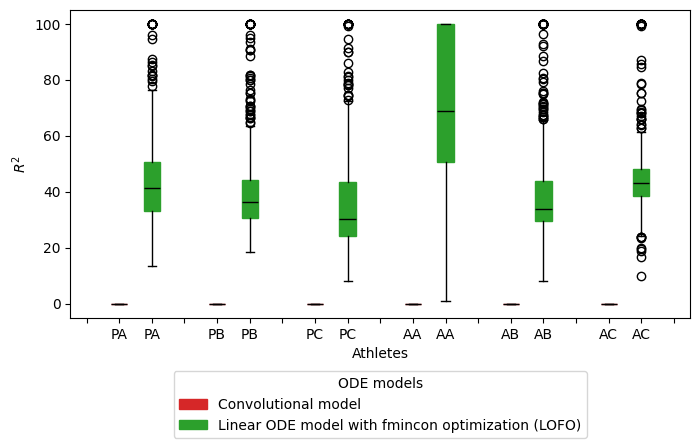

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set this to 0 if you want to make comparison of ODE models else set to 1 if you want to make comparison of fmincon vs Convolutional model
option = 1  

ode_models = ['ls_sgol','ls_fdiff','fmincon']
all_models = ['ls_sgol','ls_fdiff','fmincon','convo']

ode_conv_models = ['convo','fmincon']

method_labels = {
    'ls_sgol': 'Least squares with Savitzky Golay (LSSG)',
    'ls_fdiff': 'Least squares with finite difference (LSFD)',
    'fmincon': 'Linear ODE model with fmincon optimization (LOFO)',
    'convo': 'Convolutional model'
}


method_colors = {
    'ls_fdiff': 'tab:blue',
    'ls_sgol': 'tab:orange',
    'fmincon': 'tab:green',
    'convo': 'tab:red'
}
fig, ax = plt.subplots(figsize=(8, 4))
athlete_labels = []
all_r2_values = []
legends = []

models = ode_models if option == 0 else ode_conv_models
all_r2_values.append(([], 'none'))
athlete_labels.append('')
for file_name, df in all_results_df.items():
    curr_athlete_label = file_name
    for model in models:
        curr_model_df = df[df['Approach'] == model]
        r2_values = curr_model_df['Tau'].tolist()
        smallest_finite_value = -0.1
        r2_values = [smallest_finite_value if value < 0.0 else value for value in r2_values]
        all_r2_values.append((r2_values, method_colors[model]))
        athlete_labels.append(curr_athlete_label)
    all_r2_values.append(([], 'none'))
    athlete_labels.append('')
    
boxplot_parts = ax.boxplot([r2 for r2, _ in all_r2_values], patch_artist=True)

for idx, item in enumerate(all_r2_values):
    box_color = item[1]
    plt.setp(boxplot_parts['boxes'][idx], color=box_color)   
    plt.setp(boxplot_parts['medians'][idx], color='black')

#ax.set_xticks(np.arange(1, len(all_results_df) * (len(all_models) + 1), len(all_models) + 1))
ax.set_xticklabels(athlete_labels, rotation=0, ha='center')
ax.set_xlabel('Athletes')
ax.set_ylabel(r'$R^2$', fontweight='normal')
legend_handles = [Patch(color=method_colors[model], label=method_labels[model]) for model in models]

plt.legend(handles=legend_handles, title='ODE models', bbox_to_anchor=(0.5, -0.15), loc='upper center')

plt.show()

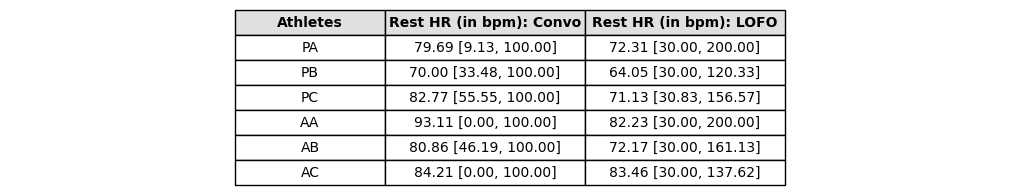

In [124]:
tau_values = [r2 for r2 in all_r2_values if r2[0]]
unique_athlete_labels = list(set(filter(None, athlete_labels)))
table_data = []
for i, athlete in enumerate(unique_athlete_labels): 
    row_data = [] 
    tau_indices = [((i*2) + j) for j in range(len(models))]
    for index in tau_indices: 
        tau_list = tau_values[index][0]
        median = np.median(tau_list)
        min_value = np.min(tau_list)
        max_value = np.max(tau_list)
        row_data.append(f'{median:.2f} [{min_value:.2f}, {max_value:.2f}]')
    table_data.append(row_data)

fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('off')
plt.subplots_adjust(left=-1.0, right=0.0, top=0.9, bottom=0.1)

model_names = {
    'fmincon': 'LOFO',
    'convo': 'Convo'
}

new_col_labels = ['Athletes'] + [f'Rest HR (in bpm): {model_names.get(model, model)}' for model in models]
athlete_entries = ['PA', 'PB', 'PC', 'AA', 'AB', 'AC']
table_data_with_athletes = []
for idx, athlete in enumerate(athlete_entries):
    table_data_with_athletes.append([athlete] + table_data[idx])

table = ax.table(cellText=table_data_with_athletes,
                 colLabels=new_col_labels,
                 colWidths=[0.15] + [0.2] * (len(table_data) - 1),
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
 
header_cells = table.get_celld()
for (i, j), cell in header_cells.items():
    if i == 0:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('#e0e0e0')


plt.show()


# paired t-test

# tau visualization

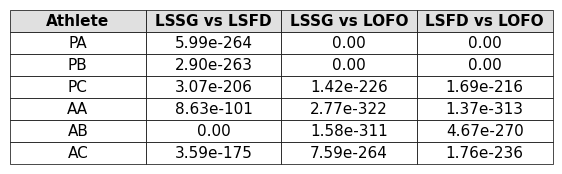

In [34]:
from scipy.stats import ttest_rel
from itertools import combinations

athlete_comp_values = {athlete: {model: [] for model in models} for athlete in all_results_df.keys()}
attribute_name = 'Tau'
for file_name, df in all_results_df.items():
    athlete = file_name
    activity_ids = df['Activity_ID'].unique()
    for activity_id in activity_ids:
        negative_r2_found = False
        for model in models:
            if 'convo' in models and 'convo' == model:
                attribute_name = 'Mode'
                neg_activity_filter_mode= df[(df['Approach'] == 'convo') & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
                neg_activity_filter_tau = df[(df['Approach'] == 'fmincon') & (df['Activity_ID'] == activity_id)]['Tau'].tolist()
                neg_activity_filter = neg_activity_filter_tau + neg_activity_filter_mode
                if any(val < 0 for val in neg_activity_filter):
                    negative_r2_found = True
                    break
            elif 'convo' in models and 'fmincon'== model:
                attribute_name = 'Tau'
                neg_activity_filter_tau = df[(df['Approach'] == 'fmincon') & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
                neg_activity_filter_mode = df[(df['Approach'] == 'convo') & (df['Activity_ID'] == activity_id)]['Mode'].tolist()
                neg_activity_filter = neg_activity_filter_tau + neg_activity_filter_mode
                if any(val < 0 for val in neg_activity_filter):
                    negative_r2_found = True
                    break
            else:
                attribute_name = 'Tau'
                neg_activity_filter = df[(df['Approach'].isin(models)) & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
                if any(val < 0 for val in neg_activity_filter):
                    negative_r2_found = True
                    break
            p_filter_values = df[(df['Approach'] == model) & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
            athlete_comp_values[athlete][model].extend(p_filter_values)

p_values = {}

for athlete, model_values in athlete_comp_values.items():
    for model1, model2 in combinations(model_values.keys(), 2):
        values1 = model_values[model1]
        values2 = model_values[model2]
        t_stat, p_val = ttest_rel(values1, values2)
        if 0 < p_val < 0.01:  
            formatted_p_val = "{:.2e}".format(p_val)
        else:
            formatted_p_val = "{:.2f}".format(p_val) 
        p_values[(athlete, model1, model2)] = formatted_p_val
print()



fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
models_replaced = ['LOFO' if model == 'fmincon' else 'LSFD' if model == 'ls_fdiff' else 'LSSG' if model == 'ls_sgol' else model for model in models]

table_data = [['Athlete'] + [f'{model1} vs {model2}' for model1, model2 in combinations(models_replaced, 2)]]

for athlete in athlete_comp_values.keys():
    row = [athlete] + [p_values.get((athlete, model1, model2), '') for model1, model2 in combinations(models, 2)]
    table_data.append(row)

table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.3] + [0.3] * (len(table_data[0]) - 1),
                 bbox=[0, 0, 1, 1], edges='closed')  

table.auto_set_font_size(False)
table.set_fontsize(11)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('#e0e0e0')
        cell.set_text_props(weight='bold')
        
for key, cell in table.get_celld().items():
    cell.set_linewidth(0.5)  

plt.show()


/var/folders/p2/qz1nhdlx4nd3qx96hzl9v3qw0000gp/T/ipykernel_98142/3942538038.py:5: RuntimeWarning: overflow encountered in exp
  result = np.exp(sigma**2 + norm.ppf(0.63) * sigma + np.log(mode))


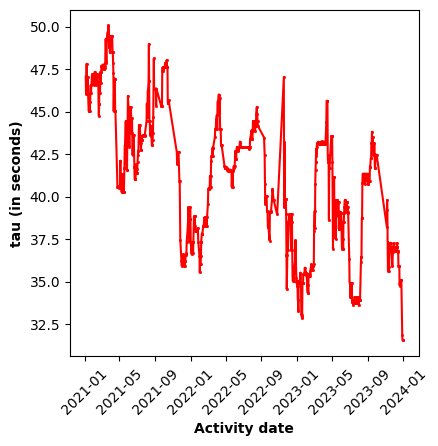

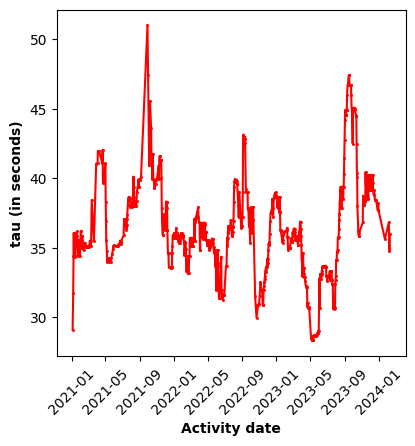

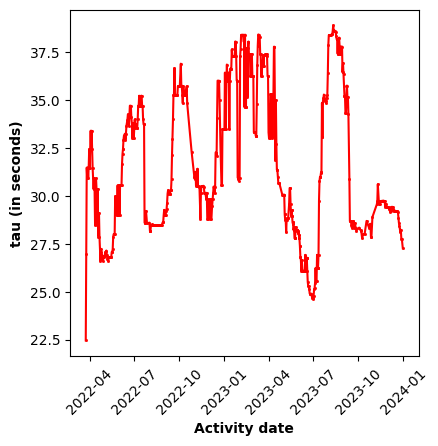

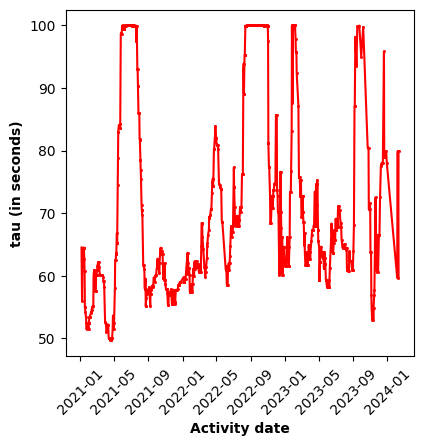

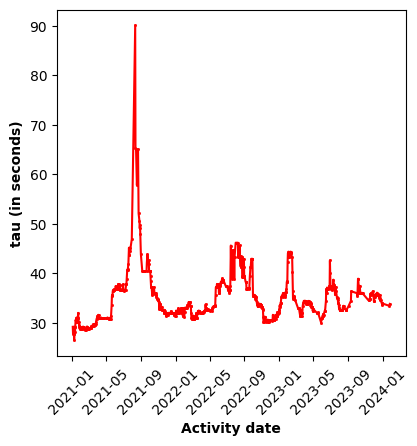

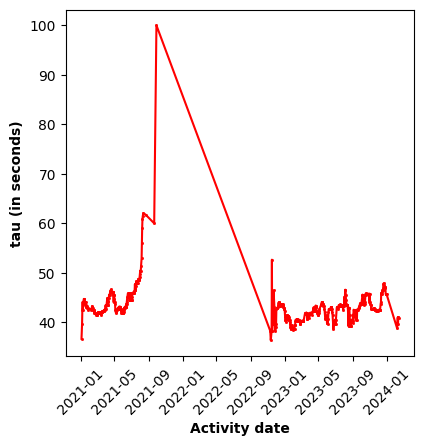

In [26]:
import numpy as np
from scipy.stats import norm
   
def calculate_tau(sigma, mode):
    result = np.exp(sigma**2 + norm.ppf(0.63) * sigma + np.log(mode))
    return round(result, 2)
    
for key, df in all_results_df.items():
    previous_tau = 0
    for index, row in df.iterrows():
        if row['Approach'] == 'convo':
            tau_value = calculate_tau(row['Sigma'], row['Mode'])
            if tau_value > 100:
                tau_value = previous_tau
            all_results_df[key].loc[index, 'Tau'] = tau_value
            previous_tau = tau_value
        
import matplotlib.pyplot as plt

file_name_labels = {
    'Connor Swift.csv' : 'PA',
    'Robert Gesink.csv' : 'PB',
    'Michal Kwiatkowski.csv' : 'PC',
    'Ralph Dowdell.csv' : 'AA',
    'Constantin Bartels.csv' : 'AB',
    'Theo Arvanitakis.csv' : 'AC'
}


def moving_average(data, window_size):
    smoothed_data = []
    for i in range(len(data)):
        start_date = data.iloc[i]['Date'] - pd.Timedelta(days=window_size)
        end_date = data.iloc[i]['Date']
        window_data = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]['Tau']

        smoothed_value = window_data.median()
        smoothed_data.append(smoothed_value)
    return smoothed_data

for file_name, df in all_results_df.items():
    param_df = df[df['Approach'] == 'fmincon'].copy()
    param_df['Date'] = pd.to_datetime(param_df['Activity_Date'])
    param_df = param_df.sort_values(by='Date')
    param_df['Smoothed_Tau'] = moving_average(param_df, window_size=42)   

    plt.figure(figsize=(4.5, 4.5))
    plt.plot(param_df['Date'], param_df['Smoothed_Tau'], marker='s', markersize=1, color='r', linestyle='None')
    plt.plot(param_df['Date'], param_df['Smoothed_Tau'], color='red', linestyle='-')
    plt.xlabel('Activity date', fontweight='bold')
    plt.ylabel('tau (in seconds)', fontweight='bold')
    #plt.title(f'Progression of tau values for {file_name} (Convolutional Model)')
    plt.xticks(rotation=45)  
    plt.show()
    # plt.figure()
    # plt.plot(param_df['Date'], param_df['Smoothed_Mode'], marker='s', markersize=1, linestyle='-', label=file_name_labels[file_name])
    # plt.xlabel('Activity date')
    # plt.ylabel('Mode (in seconds)')
    # plt.title(f'Progression of tau values for {file_name_labels[file_name]} (Method: fmincon)')
    # plt.xticks(rotation=45)
    # 
    # # Calculate and store the midpoint of each moving average plot
    # midpoint_date = param_df['Date'].iloc[len(param_df) // 2]
    # midpoint_value = param_df['Smoothed_Mode'].iloc[len(param_df) // 2]
    # midpoints.append((midpoint_date, midpoint_value))
    # 
    # # Plot midpoint line
    # plt.axvline(x=midpoint_date, color='black', linestyle='--', label='Midpoint Line')
    # 
    # plt.legend()
    # plt.show()
 
    #plt.figure()
    #plt.scatter(range(len(ls_fdiff_df)), ls_fdiff_df['Tau'])
    # for i, tau in enumerate(ls_fdiff_df['Tau']):
    #    #plt.plot(i, tau, marker='s', markersize=1, color='b')
    # plt.xlabel('Activity ID')
    # plt.ylabel('tau (in seconds)')
    # plt.title(f'Scatter Plot of tau values for {file_name_labels[file_name]} (Method: LSFD)')
    # #plt.show()
    # 
    # plt.figure()
    # for i, tau in enumerate(ls_fdiff_df['Tau']):
    #     #plt.plot(i, tau, marker='s', markersize=1, color='g')
    # plt.xlabel('Activity ID')
    # plt.ylabel('tau (in seconds)')
    # plt.title(f'Scatter Plot of tau values for {file_name_labels[file_name]} (Method: LSSG)')
    # #plt.show()


# tau visualization Combined of all athletes


import matplotlib.pyplot as plt

file_name_labels = {
    'Connor Swift.csv' : 'P_A',
    'Constantin Bartels.csv' : 'P_B',
    'Michal Kwiatkowski.csv' : 'P_C',
    'Ralph Dowdell.csv' : 'A_A',
    'Robert Gesink.csv' : 'A_B',
    'Theo Arvanitakis.csv' : 'A_C'
}

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure()

for idx, (file_name, df) in enumerate(conv_dfs.items()):
    fmincon_df = df[df['Approach'] == 'ls_fdiff']

    plt.scatter(range(len(df)), df['Tau'], marker='s', s=1, color=colors[idx], label=file_name_labels[file_name])

plt.xlabel('Activity ID')
plt.ylabel('Tau (in seconds)')
#plt.title('Scatter Plot of Tau Values for Approach: fmincon')
plt.legend()
plt.show()
